In [1]:
# Import necessary libraries for ETL and analysis purposes

import os
import pandas as pd
import numpy as np
import xgboost as xgb
from xgboost import plot_importance
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn as sns

In [2]:
# Load csv file into its dataframe

df = pd.read_csv('../Data projects/dataCSV.csv')

# Inspection of dataframe

In [3]:
# Check the number of rows and columns in the dataframe

df.shape

(6819, 96)

In [4]:
# Visual inspection of the first few rows of the dataframe

df.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


In [5]:
# function to check for missing values in the dataframe

def missing(dff): 
    print (round((dff.isnull().sum() * 100/ len(dff)),2).sort_values(ascending=False))

In [6]:
# Check for missing values in each column

missing(df)

 Equity to Liability                      0.0
 Net Income Flag                          0.0
 Operating Profit Growth Rate             0.0
 After-tax Net Profit Growth Rate         0.0
 Regular Net Profit Growth Rate           0.0
                                         ... 
 Current Liabilities/Equity               0.0
 Long-term Liability to Current Assets    0.0
 Retained Earnings to Total Assets        0.0
 Total income/Total expense               0.0
Bankrupt?                                 0.0
Length: 96, dtype: float64


In [7]:
# Check for datatype of each column

df.dtypes

Bankrupt?                                                     int64
 ROA(C) before interest and depreciation before interest    float64
 ROA(A) before interest and % after tax                     float64
 ROA(B) before interest and depreciation after tax          float64
 Operating Gross Margin                                     float64
                                                             ...   
 Liability to Equity                                        float64
 Degree of Financial Leverage (DFL)                         float64
 Interest Coverage Ratio (Interest expense to EBIT)         float64
 Net Income Flag                                              int64
 Equity to Liability                                        float64
Length: 96, dtype: object

In [8]:
# check the number of unique values in each column

df.nunique() 

Bankrupt?                                                      2
 ROA(C) before interest and depreciation before interest    3333
 ROA(A) before interest and % after tax                     3151
 ROA(B) before interest and depreciation after tax          3160
 Operating Gross Margin                                     3781
                                                            ... 
 Liability to Equity                                        6814
 Degree of Financial Leverage (DFL)                         6106
 Interest Coverage Ratio (Interest expense to EBIT)         6211
 Net Income Flag                                               1
 Equity to Liability                                        6819
Length: 96, dtype: int64

In [9]:
# Summary statistics of the entire dataset

pd.set_option('display.max_rows', None)
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Bankrupt?,6819.0,3.226280e-02,1.767102e-01,0.0,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
ROA(C) before interest and depreciation before interest,6819.0,5.051796e-01,6.068564e-02,0.0,4.765271e-01,5.027056e-01,5.355628e-01,1.000000e+00
ROA(A) before interest and % after tax,6819.0,5.586249e-01,6.562003e-02,0.0,5.355430e-01,5.598016e-01,5.891572e-01,1.000000e+00
ROA(B) before interest and depreciation after tax,6819.0,5.535887e-01,6.159481e-02,0.0,5.272766e-01,5.522780e-01,5.841051e-01,1.000000e+00
Operating Gross Margin,6819.0,6.079480e-01,1.693381e-02,0.0,6.004447e-01,6.059975e-01,6.139142e-01,1.000000e+00
Realized Sales Gross Margin,6819.0,6.079295e-01,1.691607e-02,0.0,6.004338e-01,6.059759e-01,6.138421e-01,1.000000e+00
Operating Profit Rate,6819.0,9.987551e-01,1.301003e-02,0.0,9.989692e-01,9.990222e-01,9.990945e-01,1.000000e+00
Pre-tax net Interest Rate,6819.0,7.971898e-01,1.286899e-02,0.0,7.973859e-01,7.974636e-01,7.975788e-01,1.000000e+00
After-tax net Interest Rate,6819.0,8.090836e-01,1.360065e-02,0.0,8.093116e-01,8.093752e-01,8.094693e-01,1.000000e+00
Non-industry income and expenditure/revenue,6819.0,3.036229e-01,1.116344e-02,0.0,3.034663e-01,3.035255e-01,3.035852e-01,1.000000e+00


In [10]:
# replace all ' ' with '_' to be able to plot the decision tree later

df.columns = df.columns.str.replace(" ", "_") 

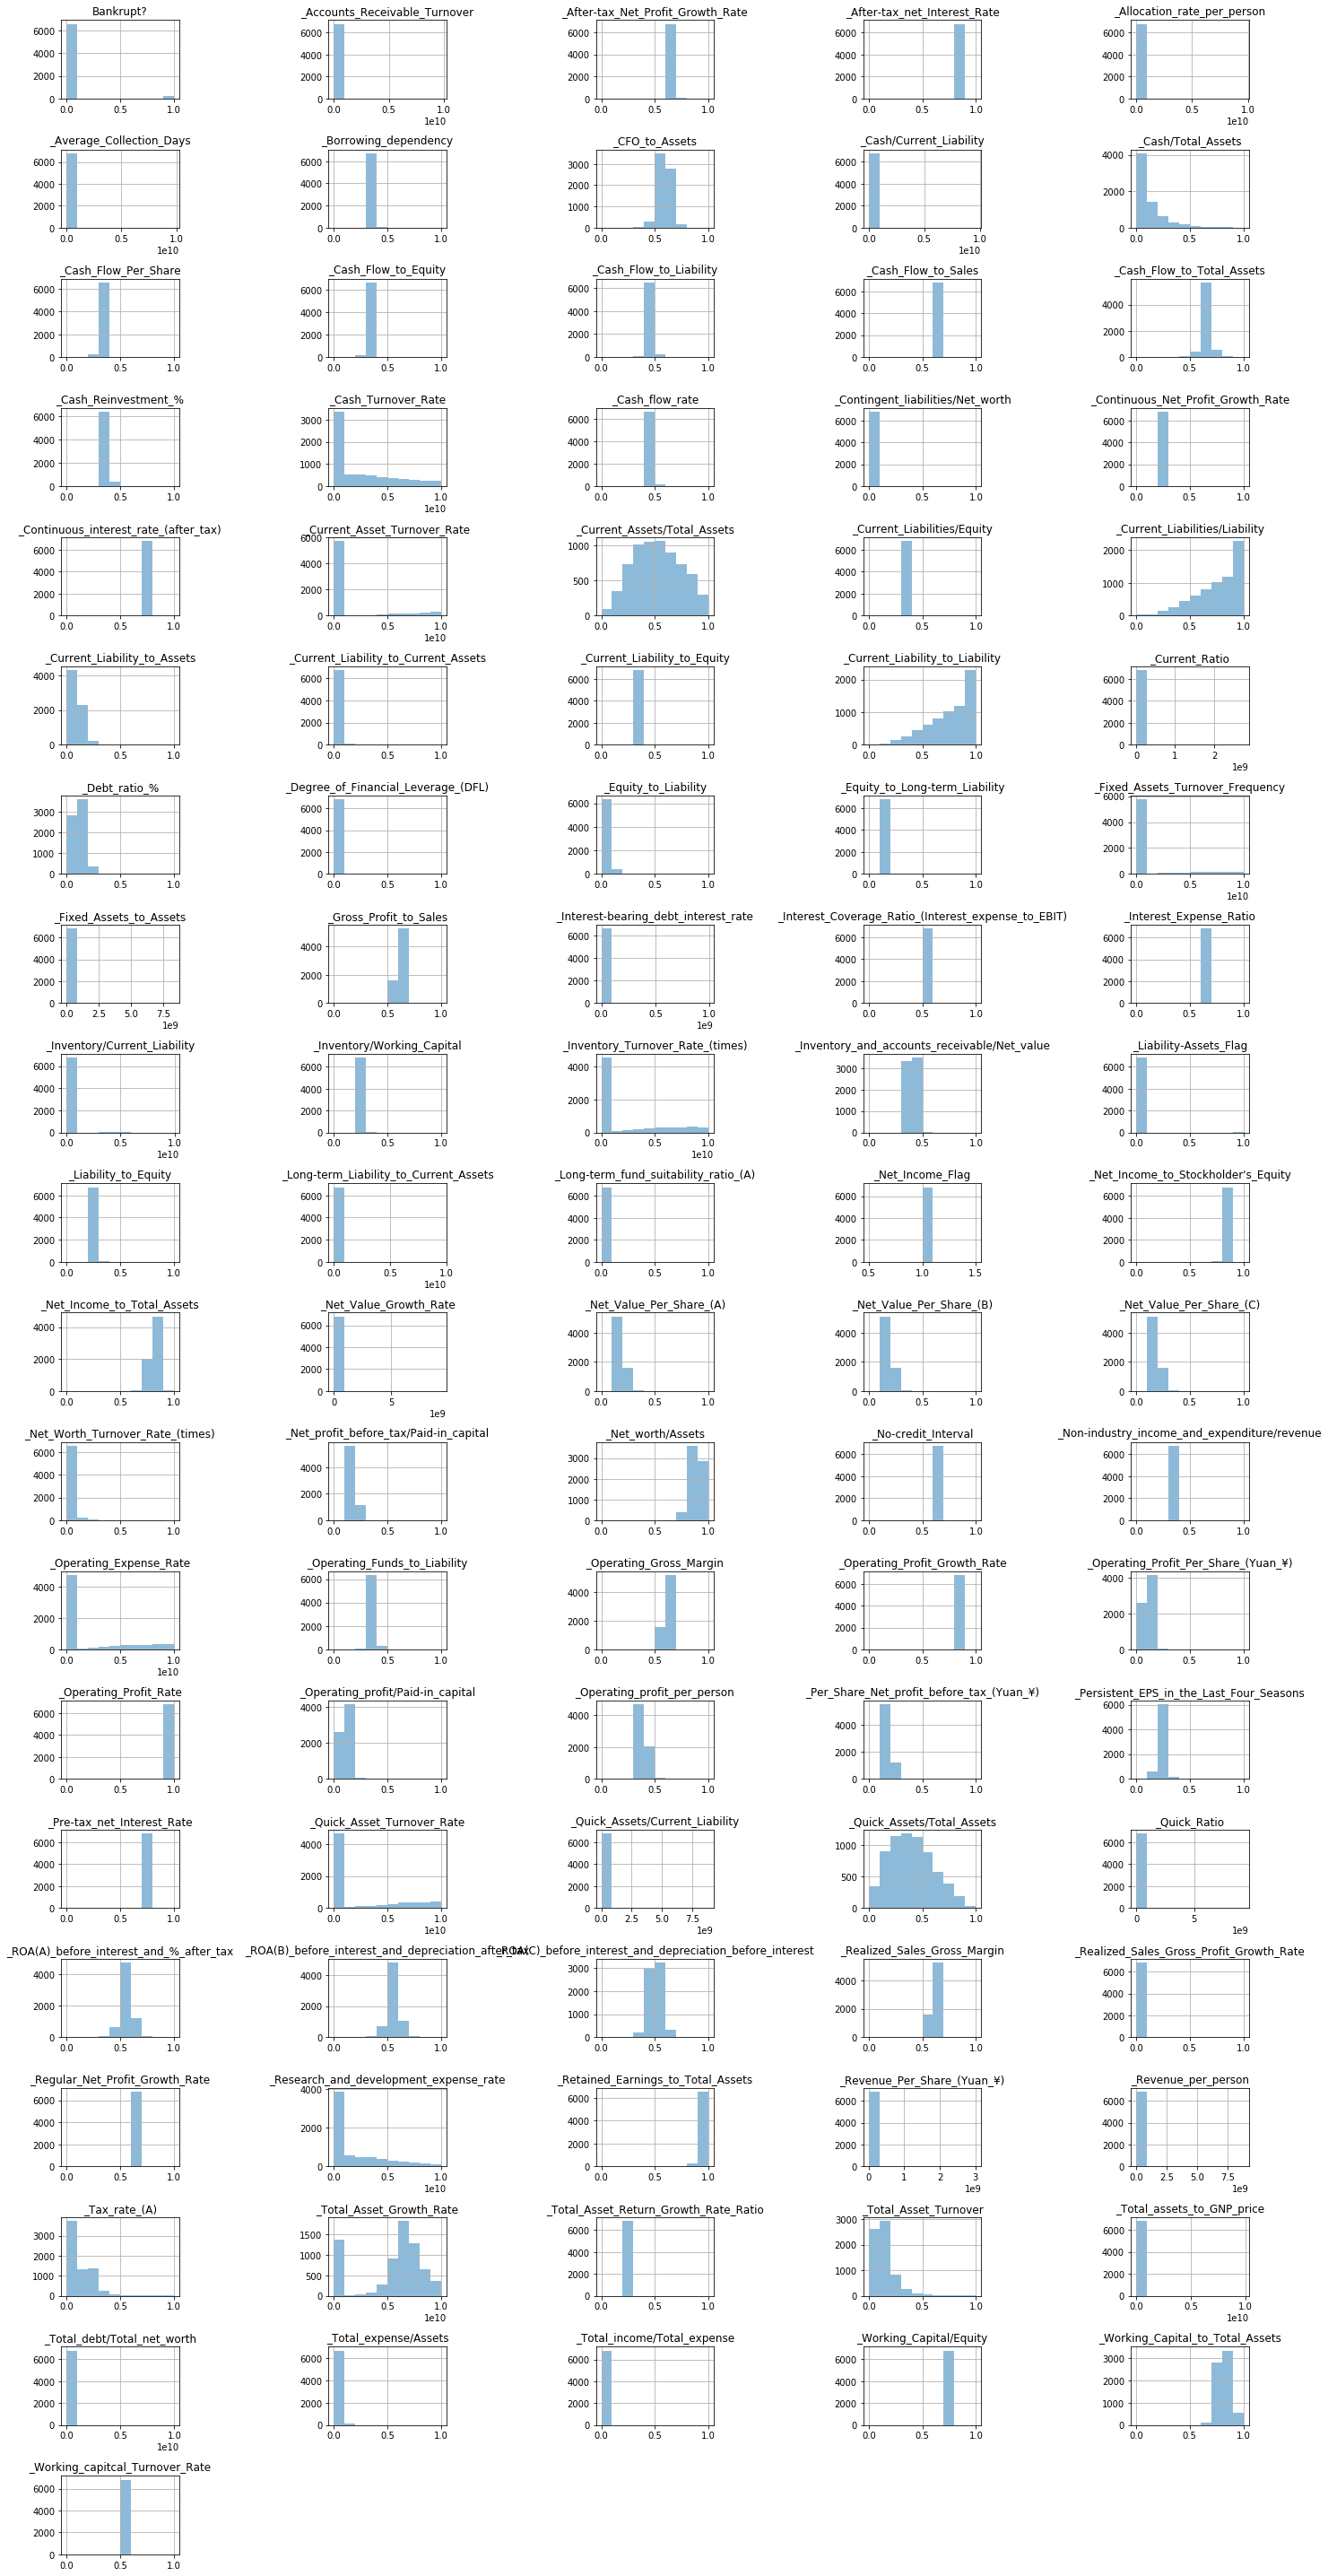

In [11]:
# Visualize the distribution of all columns

df.hist(layout = (20, 5), 
        figsize = (20,40), 
        alpha = 0.5)

plt.tight_layout()
plt.show()

In [12]:
# check for class imbalance

df.groupby(['Bankrupt?']).size() 

Bankrupt?
0    6599
1     220
dtype: int64

### Observations:
1. Clean dataset with no missing values.
2. All columns are in the correct data type format.
3. _Net_Income_Flag column has only value and can be discarded.
4. _Liability-Asset_Flag has two discrete values and will have to be encoded into dummy variable columns.
5. Most columns are on a percentage scale. 
6. Most of the columns have values that are tightly bunched up together.
7. Most of the columns with variation in values are skewed in some direction.
8. Imbalanced dataset in terms of target variable i.e. Bankrupt?

# Dummy variable encoding & Train/Test split

In [13]:
# Create dataframe with all features except for 
# target variable and net income flag as it only 
# has a single value

drop_list = ['Bankrupt?','_Net_Income_Flag']

X = df.drop(drop_list, axis = 1).copy()        
X.head()

,_ROA(C)_before_interest_and_depreciation_before_interest,_ROA(A)_before_interest_and_%_after_tax,_ROA(B)_before_interest_and_depreciation_after_tax,_Operating_Gross_Margin,_Realized_Sales_Gross_Margin,_Operating_Profit_Rate,_Pre-tax_net_Interest_Rate,_After-tax_net_Interest_Rate,_Non-industry_income_and_expenditure/revenue,_Continuous_interest_rate_(after_tax),...,_Liability-Assets_Flag,_Net_Income_to_Total_Assets,_Total_assets_to_GNP_price,_No-credit_Interval,_Gross_Profit_to_Sales,_Net_Income_to_Stockholder's_Equity,_Liability_to_Equity,_Degree_of_Financial_Leverage_(DFL),_Interest_Coverage_Ratio_(Interest_expense_to_EBIT),_Equity_to_Liability
0,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,0.780985,...,0,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,0.016469
1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,0.781506,...,0,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,0.020794
2,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,0.780284,...,0,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,0.016474
3,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,0.781241,...,0,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,0.023982
4,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,0.781550,...,0,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,0.035490


In [14]:
# Encode the liability asset flag column
# into n dummy columns and keep n-1 columns

X_encoded = pd.get_dummies(X, 
                           columns = ['_Liability-Assets_Flag'], 
                           drop_first = True)

X_encoded.head()                                                   

,_ROA(C)_before_interest_and_depreciation_before_interest,_ROA(A)_before_interest_and_%_after_tax,_ROA(B)_before_interest_and_depreciation_after_tax,_Operating_Gross_Margin,_Realized_Sales_Gross_Margin,_Operating_Profit_Rate,_Pre-tax_net_Interest_Rate,_After-tax_net_Interest_Rate,_Non-industry_income_and_expenditure/revenue,_Continuous_interest_rate_(after_tax),...,_Net_Income_to_Total_Assets,_Total_assets_to_GNP_price,_No-credit_Interval,_Gross_Profit_to_Sales,_Net_Income_to_Stockholder's_Equity,_Liability_to_Equity,_Degree_of_Financial_Leverage_(DFL),_Interest_Coverage_Ratio_(Interest_expense_to_EBIT),_Equity_to_Liability,_Liability-Assets_Flag_1
0,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,0.780985,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,0.016469,0
1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,0.781506,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,0.020794,0
2,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,0.780284,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,0.016474,0
3,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,0.781241,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,0.023982,0
4,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,0.781550,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,0.035490,0


In [15]:
# Create target variable dataframe

y = df['Bankrupt?'].copy()
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Bankrupt?, dtype: int64

In [16]:
# Check for % of bankrupt records in the entire dataset

sum(y)/len(y) 

0.03226279513125092

In [17]:
# Split into train and test sets;
# stratify based on target variable to 
# maintain class imbalance in both the sets

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, 
                                                    random_state = 42, 
                                                    stratify = y)

In [18]:
# Verify class imabalance in train set 

sum(y_train)/len(y_train) 

0.03226437231130231

In [19]:
# Verify class imbalance in test set

sum(y_test)/len(y_test) 

0.03225806451612903

# Boosting ensembling method - XGBoost Classifier 

## No optimization

In [20]:
# # Initiate XGBoost Classifier model

clf_xgb = xgb.XGBClassifier(objective = 'binary:logistic', 
                            missing = None, 
                            seed = 42) 

clf_xgb.fit(X_train,   
            y_train,
            verbose = False,
            early_stopping_rounds = 10,
            eval_metric = 'logloss',
            eval_set = [(X_test, y_test)]) # fit the model to the training data and evalute using
                                           # logloss metric on test set.

XGBClassifier(seed=42)

In [21]:
# Predict target variable on test set

clf_xgb_predict = clf_xgb.predict(X_test)

In [22]:
# Print summary report

print(classification_report(y_test,clf_xgb_predict))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1650
           1       0.65      0.27      0.38        55

    accuracy                           0.97      1705
   macro avg       0.81      0.63      0.69      1705
weighted avg       0.97      0.97      0.97      1705



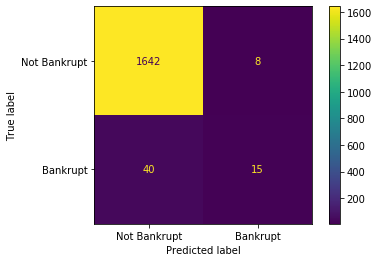

In [23]:
# Visualize predictions on the test set

plot_confusion_matrix(clf_xgb,
                      X_test,
                      y_test,
                      values_format = 'd',
                      display_labels = ['Not Bankrupt', 'Bankrupt'])

### Interpretation:

The above model aims to maximize the accuracy as no other measure has been specified yet. The model is quite accurate at 97%, however, the false negatives are high. In our case it makes sense to maximize recall as it reduces the false negatives i.e. number of instances where the company was predicted as not bankrupt however, it ended up in bankruptcy. As seen above, the recall score for class 1 is poor at 0.27. The aim is to maximize this score as wrongly classifying companies with poor financial performance as 'not bankrupt' can lead to monetary losses. 

## Optimization

#### Parameters to be optimized
1. eta [default=0.3, alias: learning_rate]. Step size shrinkage used in update to prevents overfitting. After each boosting step, we can directly get the weights of new features, and eta shrinks the feature weights to make the boosting process more conservative. Range: [0,1]

2. max_depth [default=6]. Maximum depth of a tree. Increasing this value will make the model more complex and more likely to overfit. 0 is only accepted in lossguided growing policy when tree_method is set as hist or gpu_hist and it indicates no limit on depth. Beware that XGBoost aggressively consumes memory when training a deep tree.

3. gamma [default=0, alias: min_split_loss]. Minimum loss reduction required to make a further partition on a leaf node of the tree. The larger gamma is, the more conservative the algorithm will be. Range: [0,∞]

4. lambda [default=1, alias: reg_lambda]. L2 regularization term on weights. Increasing this value will make model more conservative.

5. colsample_bytree is the subsample ratio of columns when constructing each tree. Subsampling occurs once for every tree constructed.

6. subsample [default=1]. Subsample ratio of the training instances. Setting it to 0.5 means that XGBoost would randomly sample half of the training data prior to growing trees. and this will prevent overfitting. Subsampling will occur once in every boosting iteration. Range: (0,1]

7. min_child_weight [default=1]. Minimum sum of instance weight (hessian) needed in a child. If the tree partition step results in a leaf node with the sum of instance weight less than min_child_weight, then the building process will give up further partitioning. In linear regression task, this simply corresponds to minimum number of instances needed to be in each node. The larger min_child_weight is, the more conservative the algorithm will be. Range: [0,∞]

8. max_delta_step [default=0]. Maximum delta step we allow each leaf output to be. If the value is set to 0, it means there is no constraint. If it is set to a positive value, it can help making the update step more conservative. Usually this parameter is not needed, but it might help in logistic regression when class is extremely imbalanced. Set it to value of 1-10 might help control the update. Range: [0,∞]

9. scale_pos_weight [default=1]. Control the balance of positive and negative weights, useful for unbalanced classes. A typical value to consider: sum(negative instances) / sum(positive instances)

https://xgboost.readthedocs.io/en/latest/parameter.html

In [24]:
# Create list of possible options for each parameter chosen

#1st attempt
#param_grid = {
#    'max_depth': [3,5,7],
#    'gamma' : [0.05, 0.1, 0.2],
#    'reg_lambda' : [1, 5, 10],
#    'learning_rate': [0.01, 0.1, 0.15],
#    'scale_pos_weight' : [1, 15, 30],
#    'min_child_weight' : [0, 1, 5],
#    'max_delta_step' : [0, 1, 5]
#}
#2nd attempt
#param_grid = {
#    'max_depth': [3],
#    'gamma' : [0.05],
#    'reg_lambda' : [10, 20, 50],
#    'learning_rate': [0.01],
#    'scale_pos_weight' : [30, 50, 100, 125, 150, 175, 200],
#    'min_child_weight' : [0],
#    'max_delta_step' : [1]
#}

In [25]:
# Initialize GridSearchCV and pass in the scoring method and
# parameter grid created above

#optimal_params = GridSearchCV(
#                estimator = xgb.XGBClassifier(objective = 'binary:logistic',
#                                              seed = 42, 
#                                              subsample = 0.5, 
#                                              colsample_bytree = 0.7),
#                param_grid = param_grid,
#                scoring = 'recall',
#                verbose = 2,
#                n_jobs = -1,
#                cv = 3
#)

In [26]:
# Apply the fit method to the training set and 
# evaluate using loss function i.e. logloss

#optimal_params.fit(X_train,
#                   y_train,
#                   early_stopping_rounds = 10,
#                   eval_metric = 'logloss',
#                   eval_set = [(X_test, y_test)],
#                   verbose = False)
#print(optimal_params.best_params_)

#### Output:

1. Fitting 3 folds for each of 2187 candidates, totalling 6561 fits
{'gamma': 0.05, 'learning_rate': 0.01, 'max_delta_step': 1, 'max_depth': 3, 'min_child_weight': 0, 'reg_lambda': 10, 'scale_pos_weight': 30}

2. Fitting 3 folds for each of 21 candidates, totalling 63 fits
{'gamma': 0.05, 'learning_rate': 0.01, 'max_delta_step': 1, 'max_depth': 3, 'min_child_weight': 0, 'reg_lambda': 10, 'scale_pos_weight': 150}

In [27]:
# Use optimal parameters from the above search
# to initiate the model and fit the test data 

opt_clf_xgb_recall = xgb.XGBClassifier(objective = 'binary:logistic', missing = None, 
                                       seed = 42, gamma = 0.05, 
                                       learning_rate = 0.01, max_depth = 3, 
                                       reg_lambda = 10.0, scale_pos_weight = 150, 
                                       n_estimators = 1000, colsample_bytree = 0.7, 
                                       subsample = 0.5, max_delta_step = 1,
                                       min_child_weight = 0)
opt_clf_xgb_recall.fit(X_train,
                       y_train,
                       verbose = False,
                       early_stopping_rounds = 10,
                       eval_metric = 'logloss',
                       eval_set = [(X_test, y_test)])

XGBClassifier(colsample_bytree=0.7, gamma=0.05, learning_rate=0.01,
              max_delta_step=1, min_child_weight=0, n_estimators=1000,
              reg_lambda=10.0, scale_pos_weight=150, seed=42, subsample=0.5)

In [28]:
# Predict target variable on test set

opt_xgb_predict_recall = opt_clf_xgb_recall.predict(X_test)

In [29]:
# Print summary report

print(classification_report(y_test,opt_xgb_predict_recall))

              precision    recall  f1-score   support

           0       0.99      0.89      0.94      1650
           1       0.21      0.84      0.33        55

    accuracy                           0.89      1705
   macro avg       0.60      0.87      0.64      1705
weighted avg       0.97      0.89      0.92      1705



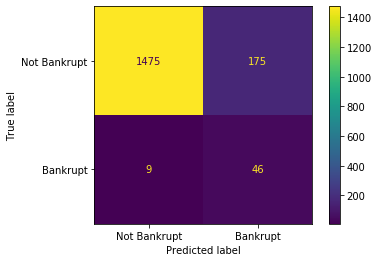

In [30]:
# Visualize predictions on test set

plot_confusion_matrix(opt_clf_xgb_recall,
                      X_test,
                      y_test,
                      values_format = 'd',
                      display_labels = ["Not Bankrupt", "Bankrupt"])

### Interpretation:

The recall score for class 1 has improved a lot from 0.27 to 0.84; however it comes at the cost of reduced precision for the same class. Precision score for class 1 has dropped from 0.65 to 0.21. This means there is an increase in the number of false positives. However, the cost of missing out on investing in some companies that will perform satisfactorily is less than investing in companies that are likely to go bankrupt (assumption).

# Feature selection using ANOVA

Our target variable is categorical and the rest of the features in the dataset are continuous. We can use the F-score to check which variables show the highest variance within the classes i.e. bankrupt/not bankrupt. Higher the variance, the better the feature is able to differentiate the two classes.

In [31]:
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func = f_classif, k = 10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features

                                                Specs       Score
85                        _Net_Income_to_Total_Assets  753.348894
1             _ROA(A)_before_interest_and_%_after_tax  593.228629
2   _ROA(B)_before_interest_and_depreciation_after...  549.202093
0   _ROA(C)_before_interest_and_depreciation_befor...  497.535121
37                                  _Net_worth/Assets  455.091150
36                                      _Debt_ratio_%  455.091150
18           _Persistent_EPS_in_the_Last_Four_Seasons  345.267516
67                 _Retained_Earnings_to_Total_Assets  339.411396
42             _Net_profit_before_tax/Paid-in_capital  307.823235
22          _Per_Share_Net_profit_before_tax_(Yuan_¥)  288.185466


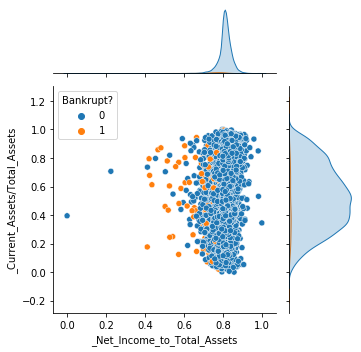

In [32]:
# Visual representation of results

sns.jointplot(data = df, 
              x = "_Net_Income_to_Total_Assets", 
              y = "_Current_Assets/Total_Assets", 
              hue = "Bankrupt?",
              height = 5, 
              ratio = 3)

#### Explanation

We have two classes i.e. Bankrupt/Not Bankrupt and we want to find a score for each feature saying "how well this feature discriminates between two classes". Now look at the figure above; the feature on the x-axis is #1 on our list based on ANOVA test and the feature on teh y-axis is rank #65. There are two classes '0' & '1' and two features on x and y axes. x feature is a better separator than y because if we project data on x axis we get better separated classes but if we project data onto y, two classes have a lot of overlap. We will use the top ten features in our XGBoost classifier to see if we can obtain better results as we will be removing a lot of 'noise' from our dataset.

# Classification using top ten features 

In [33]:
# Create dataframe with ten features and target variable

top10_features_df = df[['_Net_Income_to_Total_Assets',
                        '_Net_worth/Assets', 
                        '_Debt_ratio_%', 
                        '_Persistent_EPS_in_the_Last_Four_Seasons', 
                        '_Retained_Earnings_to_Total_Assets', 
                        '_Net_profit_before_tax/Paid-in_capital', 
                        '_Per_Share_Net_profit_before_tax_(Yuan_¥)',
                        '_ROA(C)_before_interest_and_depreciation_before_interest',
                        '_ROA(A)_before_interest_and_%_after_tax',
                        '_ROA(B)_before_interest_and_depreciation_after_tax',
                        'Bankrupt?']].copy()

In [34]:
# Create dataframe with feature variables only

drop_list_2 = ['Bankrupt?']

X_top10 = top10_features_df.drop(drop_list_2, axis = 1).copy()

In [35]:
# Create dataframe with target variable only

y_top10 = top10_features_df['Bankrupt?'].copy()

In [36]:
# Split into train and test sets and 
# maintain class imbalance by stratifying
# based on target variable

X_train10, X_test10, y_train10, y_test10 = train_test_split(X_top10, y_top10, 
                                                            random_state=42, 
                                                            stratify = y_top10)

In [37]:
# Create list of possible options for each parameter chosen

#1st attempt
#param_grid_2 = {
#    'max_depth': [3,5,7],
#    'gamma' : [0.05, 0.1, 0.2],
#    'reg_lambda' : [1, 5, 10],
#    'learning_rate': [0.01, 0.1, 0.15],
#    'scale_pos_weight' : [1, 15, 30],
#    'min_child_weight' : [0, 1, 5],
#    'max_delta_step' : [0, 1, 5]
#}
#2nd attempt
#param_grid_2 = {
#    'max_depth': [3],
#    'gamma' : [0.05],
#    'reg_lambda' : [1],
#    'learning_rate': [0.01],
#    'scale_pos_weight' : [30, 50, 100, 125, 150, 175, 200],
#    'min_child_weight' : [0],
#    'max_delta_step' : [1]
#}

In [38]:
# Initialize GridSearchCV and pass in the scoring method and
# parameter grid created above

#optimal_params_2 = GridSearchCV(
#                estimator = xgb.XGBClassifier(objective = 'binary:logistic',
#                             seed = 42, subsample = 0.5),
#               param_grid = param_grid_2,
#                scoring = 'recall',
#                verbose = 2,
#                n_jobs = 10,
#                cv = 3
#)

In [39]:
# Apply the fit method to the training set and 
# evaluate using loss function i.e. logloss

#optimal_params_2.fit(X_train10,
#                  y_train10,
#                  early_stopping_rounds = 10,
#                  eval_metric = 'logloss',
#                  eval_set = [(X_test10, y_test10)],
#                  verbose = False)
#print(optimal_params_2.best_params_)

#### Output:

1. Fitting 3 folds for each of 2187 candidates, totalling 6561 fits
{'gamma': 0.05, 'learning_rate': 0.01, 'max_delta_step': 1, 'max_depth': 3, 'min_child_weight': 0, 'reg_lambda': 1, 'scale_pos_weight': 30}
2. Fitting 3 folds for each of 7 candidates, totalling 21 fits
{'gamma': 0.05, 'learning_rate': 0.01, 'max_delta_step': 1, 'max_depth': 3, 'min_child_weight': 0, 'reg_lambda': 1, 'scale_pos_weight': 150}

In [40]:
# Use optimal parameters from the above search
# to initiate the model and fit the test data 

clf_xgb_top10 = xgb.XGBClassifier(objective='binary:logistic', missing = None, 
                                  seed = 42, gamma = 0.05, 
                                  learning_rate = 0.01, max_depth = 3, 
                                  reg_lambda = 1.0, scale_pos_weight = 150, 
                                  n_estimators = 1000, subsample = 0.5,
                                  max_delta_step = 1, min_child_weight = 0)

clf_xgb_top10.fit(X_train10,
                  y_train10,
                  verbose = False,
                  early_stopping_rounds = 10,
                  eval_metric = 'logloss',
                  eval_set = [(X_test10, y_test10)])

XGBClassifier(gamma=0.05, learning_rate=0.01, max_delta_step=1,
              min_child_weight=0, n_estimators=1000, reg_lambda=1.0,
              scale_pos_weight=150, seed=42, subsample=0.5)

In [41]:
# Predict target variable on test set

opt_xgb_predict_recall_top10 = clf_xgb_top10.predict(X_test10)

In [42]:
# Print summary report

print(classification_report(y_test10,opt_xgb_predict_recall_top10))

              precision    recall  f1-score   support

           0       1.00      0.74      0.85      1650
           1       0.11      0.91      0.19        55

    accuracy                           0.75      1705
   macro avg       0.55      0.83      0.52      1705
weighted avg       0.97      0.75      0.83      1705



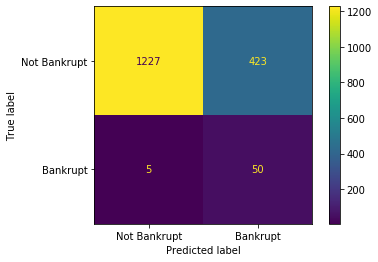

In [43]:
# Visualize classification results on test set

plot_confusion_matrix(clf_xgb_top10,
                     X_test10,
                     y_test10,
                     values_format = 'd',
                     display_labels = ["Not Bankrupt", "Bankrupt"])

### Interpretation

Recall for class 1 has increased to 0.91 from 0.84 as compared to the previous model that included all features. By reducing noise, we are able to improve the required score i.e. recall in our case.

## Oversampling using SMOTE (Synthetic Minority Oversampling TEchnique)

There are a number of methods available to oversample a dataset used in a typical classification problem (using a classification algorithm to classify a set of images, given a labelled training set of images). The most common technique is known as SMOTE: Synthetic Minority Over-sampling Technique. To illustrate how this technique works consider some training data which has s samples, and f features in the feature space of the data. Note that these features, for simplicity, are continuous. As an example, consider a dataset of birds for classification. The feature space for the minority class for which we want to oversample could be beak length, wingspan, and weight (all continuous). To then oversample, take a sample from the dataset, and consider its k nearest neighbors (in feature space). To create a synthetic data point, take the vector between one of those k neighbors, and the current data point. Multiply this vector by a random number x which lies between 0, and 1. Add this to the current data point to create the new, synthetic data point.

https://en.wikipedia.org/wiki/Oversampling_and_undersampling_in_data_analysis#SMOTE

In [44]:
# using SMOTE to balance the classes in the training data

sm = SMOTE(random_state = 42) 
X_sm, y_sm = sm.fit_resample(X_train, y_train)

In [45]:
# Verify shape of training data before and after SMOTE application

from collections import Counter
print('Original dataset shape %s' % Counter(y_train))
print('Resampled dataset shape %s' % Counter(y_sm))

Original dataset shape Counter({0: 4949, 1: 165})
Resampled dataset shape Counter({0: 4949, 1: 4949})


In [46]:
# Create list of possible options for each parameter chosen

#1st attempt
#param_grid_3 = {
#    'max_depth': [3,5,7],
#    'gamma' : [0.05, 0.1, 0.2],
#    'reg_lambda' : [1, 5, 10],
#    'learning_rate': [0.01, 0.1, 0.15],
#    'scale_pos_weight' : [1, 15, 30],
#    'min_child_weight' : [0, 1, 5],
#    'max_delta_step' : [0, 1, 5]
#}
#2nd attempt
#param_grid_3 = {
#    'max_depth': [3],
#    'gamma' : [0.05],
#    'reg_lambda' : [10,20,30],
#    'learning_rate': [0.01],
#    'scale_pos_weight' : [30, 50, 100],
#    'min_child_weight' : [0],
#    'max_delta_step' : [0]
#}

In [47]:
# Initialize GridSearchCV and pass in the scoring method and
# parameter grid created above

#optimal_params_3 = GridSearchCV(
#                estimator = xgb.XGBClassifier(objective = 'binary:logistic',
#                                              seed = 42,
#                                              subsample = 0.5,
#                                              colsample_bytree = 0.5),
#                param_grid = param_grid_3,
#                scoring = 'recall',
#                verbose = 2,
#                n_jobs = 10,
#                cv = 3
#)

In [48]:
# Apply the fit method to the training set and 
# evaluate using loss function i.e. logloss

#optimal_params_3.fit(X_sm,
#                  y_sm,
#                  early_stopping_rounds = 10,
#                  eval_metric = 'logloss',
#                  eval_set = [(X_test, y_test)],
#                  verbose = False)
#print(optimal_params_3.best_params_)

#### Output:

1. Fitting 3 folds for each of 2187 candidates, totalling 6561 fits
{'gamma': 0.05, 'learning_rate': 0.01, 'max_delta_step': 0, 'max_depth': 3, 'min_child_weight': 0, 'reg_lambda': 10, 'scale_pos_weight': 30}
2. Fitting 3 folds for each of 9 candidates, totalling 27 fits
{'gamma': 0.05, 'learning_rate': 0.01, 'max_delta_step': 0, 'max_depth': 3, 'min_child_weight': 0, 'reg_lambda': 10, 'scale_pos_weight': 30}

In [49]:
# Use optimal parameters from the above search
# to initiate the model and fit the test data 

clf_xgb_sm = xgb.XGBClassifier(objective='binary:logistic', missing = None, 
                               seed = 42, gamma = 0.05, 
                               learning_rate = 0.01, max_depth = 3, 
                               reg_lambda = 10.0, scale_pos_weight = 30, 
                               n_estimators = 1000, subsample = 0.5, 
                               max_delta_step = 0, min_child_weight = 0, 
                               colsample_bytree = 0.5)

clf_xgb_sm.fit(X_sm,
               y_sm,
               verbose = False,
               early_stopping_rounds = 10,
               eval_metric = 'logloss',
               eval_set = [(X_test, y_test)])

XGBClassifier(colsample_bytree=0.5, gamma=0.05, learning_rate=0.01,
              min_child_weight=0, n_estimators=1000, reg_lambda=10.0,
              scale_pos_weight=30, seed=42, subsample=0.5)

In [50]:
# Predict target variable on test set

opt_xgb_predict_recall_sm = clf_xgb_sm.predict(X_test)

In [51]:
# Print summary report

print(classification_report(y_test,opt_xgb_predict_recall_sm))

              precision    recall  f1-score   support

           0       1.00      0.62      0.76      1650
           1       0.08      0.96      0.14        55

    accuracy                           0.63      1705
   macro avg       0.54      0.79      0.45      1705
weighted avg       0.97      0.63      0.74      1705



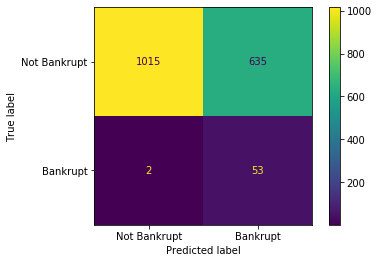

In [52]:
# Visualize classification results on test set

plot_confusion_matrix(clf_xgb_sm,
                      X_test,
                      y_test,
                      values_format = 'd',
                      display_labels = ["Not Bankrupt", "Bankrupt"])

### Interpretation

Using SMOTE altered training dataset, the Recall for class 1 has increased to 0.96 from 0.91 as compared to the previous model that included all features. We will use this as our final model and plot it below.

If we were tasked to invest $X among 1705 different companies in our test set, based on our model, we would select 1015 out of which 2 are likely to end up in bankruptcy. We will be giving up investing in 637 companies which would have not gone bankrupt. However, for the purpose of diversification, 1013 companies is still a large number while minimizing the losses incurred with bankruptcies. This is eventually a business decision.

## Plotting final model

In [53]:
node_params = {'shape' : 'box',
              'style' : 'filled, rounded',
              'fillcolor' : '#78cbe'}

leaf_params = {'shape' : 'box',
              'style' : 'filled',
              'fillcolor' : '#e48038'}

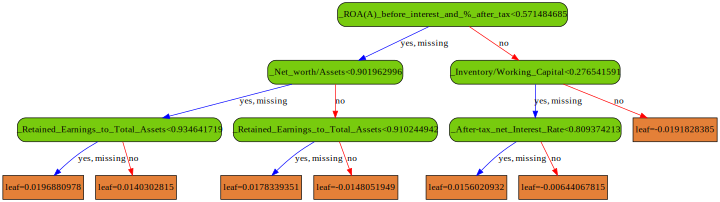

In [54]:
xgb.to_graphviz(clf_xgb_sm, 
                num_trees = 0, 
                size = "10,10",
                condition_node_params = node_params,
                leaf_node_params = leaf_params)

## Individual leaf interpretation

In [55]:
1/(1+np.exp(-1*0.0196880978))

0.5049218654660793

For a classification tree with 2 classes {0,1}, the value of the leaf node represent the raw score for class 1 i.e. bankrupt. It can be converted to a probability score by using the logistic function. What this means is if a data point ends up being distributed to the left most leaf, the probability of this data point being class 1 is 0.5049218654660793 (shown above). And if the data point ends up in the right most leaf, then the probability of this data point being in class 1 is 0.49520443743054093 (shown below).

In [56]:
1/(1+np.exp(-1*-0.0191828385))

0.49520443743054093